In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def calc_chi2(y, err, yfit , v = True):
    """
    Compute chi2 between data and fitted curve

    Parameters
    ----------
    y: array
        y values of data
    err: array (1D or 2D)
        either error bars (if independent data points)
        or covariance matrix
    yfit: array
        fitted values of data
    v: bool
        verbose output

    Returns
    -------
    chi2: float
    """
    if err.shape == (len(y),len(y)):
        #use full covariance
        if v:
            print('cov_mat chi2')
        inv_cov = np.linalg.inv( np.matrix(err) )
        chi2 = 0
        for i in range(len(y)):
            for j in range(len(y)):
                chi2 = chi2 + (y[i]-yfit[i])*inv_cov[i,j]*(y[j]-yfit[j])
        return chi2
        
    elif err.shape == (len(y),):
        if v:
            print('diagonal chi2')
        return sum(((y-yfit)**2.)/(err**2.))
    else:
        raise IOError('error in err or cov_mat input shape')

In [3]:
def norm_cov(cov):
    """
    normalize the input covariance matrix
    """
    norm = cov.copy()
    for i in range(len(cov)):
        for j in range(len(cov)):
            norm[i][j] /= np.sqrt(cov[i][i]*cov[j][j])
    return norm

collapsed cells below are desy1:

In [4]:
desy1t = h5py.File('../TXPipe/data/desy1/outputs/tau_stats.hdf5','r')
desy1r = h5py.File('../TXPipe/data/desy1/outputs/rowe_stats.hdf5','r')
desy1_tau = np.append(desy1t['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy1t['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy1t['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy1_cov = desy1t['tau_statistics/tau_PSF-reserved/cov'][:]
desy1_cov_diag = desy1t['tau_statistics/tau_PSF-reserved/cov'][:]
desy1_fit = np.append(desy1t['tau_statistics/bestfits_PSF-reserved/alpha']*desy1r['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/beta']*desy1r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/eta']*desy1r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy1t['tau_statistics/bestfits_PSF-reserved/alpha']*desy1r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/beta']*desy1r['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/eta']*desy1r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy1t['tau_statistics/bestfits_PSF-reserved/alpha']*desy1r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/beta']*desy1r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy1t['tau_statistics/bestfits_PSF-reserved/eta']*desy1r['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])
desy1t.close()
desy1r.close()


In [5]:
print(np.shape(desy1_cov))
print(np.shape(desy1_tau))
print(np.shape(desy1_fit))

(60, 60)
(60,)
(60,)


In [6]:
desy1_chisq = calc_chi2(desy1_tau,desy1_cov,desy1_fit)
print(desy1_chisq/(60))

cov_mat chi2
24.408738885346676


desy3 bootstrap:

In [7]:
desy3t = h5py.File('../TXPipe/data/desy3/outputs/tau_stats.hdf5','r')
desy3r = h5py.File('../TXPipe/data/desy3/outputs/rowe_stats.hdf5','r')
desy3_tau = np.append(desy3t['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3t['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3t['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_cov = desy3t['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fit = np.append(desy3t['tau_statistics/bestfits_PSF-reserved/alpha']*desy3r['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/beta']*desy3r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/eta']*desy3r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3t['tau_statistics/bestfits_PSF-reserved/alpha']*desy3r['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/beta']*desy3r['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/eta']*desy3r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3t['tau_statistics/bestfits_PSF-reserved/alpha']*desy3r['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/beta']*desy3r['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3t['tau_statistics/bestfits_PSF-reserved/eta']*desy3r['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])
#desy3t.close()
#desy3r.close()

In [8]:
desy3_chisq = calc_chi2(desy3_tau,desy3_cov,desy3_fit)
print(desy3_chisq/(60))

cov_mat chi2
18.765127002888757


checking jackknife cov:

In [9]:
desy3tjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife/tau_stats-40patches.hdf5','r')
desy3rjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife/rowe_stats-40patches.hdf5','r')
desy3_taujk = np.append(desy3tjk['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3tjk['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3tjk['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_covjk = desy3tjk['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fitjk = np.append(desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])


In [10]:
desy3jk_chisq = calc_chi2(desy3_taujk,desy3_covjk,desy3_fitjk)
print(desy3jk_chisq/(60))

cov_mat chi2
-1125365828852102.8


In [11]:
np.shape(desy3_covjk)

(60, 60)

In [12]:
desy3_covjk[1]

array([ 4.19735229e-12,  2.31097697e-11,  1.63866493e-12,  3.48603103e-12,
        2.88638378e-12,  2.51713932e-12,  1.92623596e-12,  1.33980501e-12,
        1.66497553e-12,  1.61415660e-12,  1.50921256e-12,  1.44738248e-12,
        1.36669970e-12,  1.44003400e-12,  1.41748617e-12,  1.49369980e-12,
        1.30308936e-12,  1.26601496e-12,  1.22373531e-12,  1.18470065e-12,
        5.46002476e-13, -2.90655114e-12,  1.08803579e-12, -6.18900801e-13,
        1.70450832e-13,  1.76687956e-13,  1.96089648e-14,  3.49038558e-14,
       -2.74473782e-14,  6.62661813e-14, -9.37845272e-15, -4.51092059e-15,
       -1.47677356e-14,  2.68783189e-14,  6.32619213e-16,  1.15233388e-15,
        7.74326779e-15,  3.03367965e-15,  8.85030425e-16,  5.67826526e-15,
        2.57934798e-13, -2.26986672e-13,  2.25160816e-13,  5.96820789e-14,
        2.08369002e-14, -5.06409009e-14, -2.75860645e-14, -1.57430441e-15,
       -1.84504272e-14,  2.75754185e-15, -9.74379852e-16, -7.80092862e-16,
        4.39329570e-16, -

In [13]:
lst = range(10)
cov_sum = np.zeros((60,60))
for i in lst:
    with h5py.File(f'../TXPipe/data/desy3/outputs_jkknife/tau_stats-{i+1}.hdf5') as f:
        cov_sum = cov_sum+f['tau_statistics/tau_PSF-reserved/cov'][:] 
    cov_avg = cov_sum/10

In [14]:
print(calc_chi2(desy3_taujk,cov_avg,desy3_fitjk))

cov_mat chi2
1907.658629579518


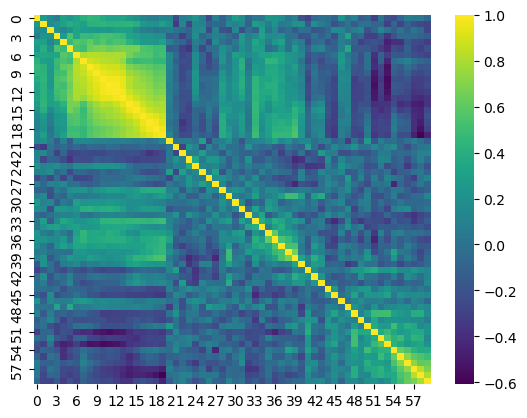

In [15]:
ax = sns.heatmap(norm_cov(cov_avg),cmap='viridis')
plt.show()

trying cov with 150 patches

In [16]:
desy3tjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife/tau_stats-150-1.hdf5','r')
desy3rjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife/rowe_stats-150-1.hdf5','r')
desy3_taujk = np.append(desy3tjk['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3tjk['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3tjk['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_covjk = desy3tjk['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fitjk = np.append(desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])


In [17]:
print(calc_chi2(desy3_taujk,desy3_covjk,desy3_fitjk))

cov_mat chi2
168.44709945619928


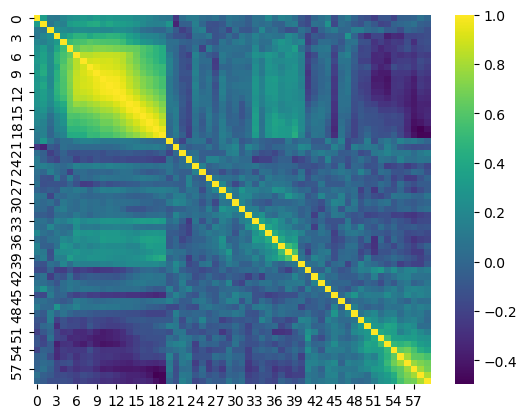

In [18]:
ax = sns.heatmap(norm_cov(desy3_covjk),cmap='viridis')
plt.show()

In [20]:
lst = range(10)
cov_sum = np.zeros((60,60))
for i in lst:
    with h5py.File(f'../TXPipe/data/desy3/outputs_jkknife/tau_stats-150-{i+1}.hdf5') as f:
        cov_sum = cov_sum+f['tau_statistics/tau_PSF-reserved/cov'][:] 
    cov_avg = cov_sum/10

In [21]:
print(calc_chi2(desy3_taujk,cov_avg,desy3_fitjk))

cov_mat chi2
168.44709945619883


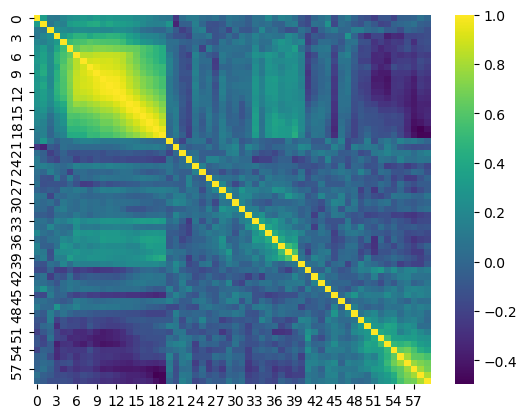

In [22]:
ax = sns.heatmap(norm_cov(cov_avg),cmap='viridis')
plt.show()

In [10]:
import os
import pickle
# Get the list of all files and directories
path = "../covs/"
dir_list = os.listdir(path)
cov_sum = np.array(np.zeros((60,60)))
for i in dir_list:
    with open(path+f'{i}', 'rb') as file:
        cov_ = pickle.load(file)
    cov_sum = cov_sum+np.array(cov_["res"]) 
cov_avg = cov_sum/len(dir_list)
with open('avgd_covs.pkl', 'wb') as newfile:
    pickle.dump(cov_avg,newfile)

In [25]:
with open('avgd_covs.pkl', 'rb') as file:
        cov_ = pickle.load(file)

In [26]:
np.shape(cov_)

(1, 60, 60)

In [27]:
np.shape(cov_[0])

(60, 60)

In [17]:
desy3tjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife_avgd/tau_stats.hdf5','r')
desy3rjk = h5py.File('../TXPipe/data/desy3/outputs_jkknife_avgd/rowe_stats.hdf5','r')
desy3_taujk = np.append(desy3tjk['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3tjk['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3tjk['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_covjk = desy3tjk['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fitjk = np.append(desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3tjk['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rjk['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/beta']*desy3rjk['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3tjk['tau_statistics/bestfits_PSF-reserved/eta']*desy3rjk['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])

In [32]:
print(calc_chi2(desy3_taujk,desy3_covjk,desy3_fitjk))

cov_mat chi2
398.6275263435572


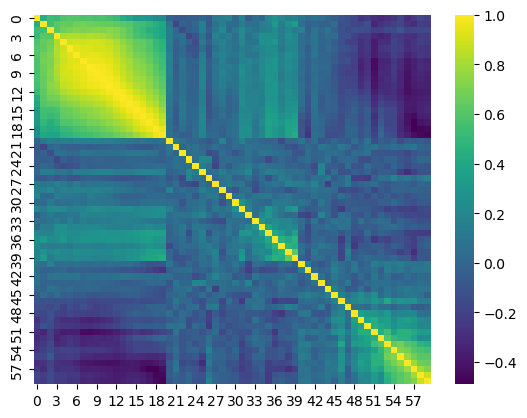

In [29]:
ax = sns.heatmap(norm_cov(cov_[0]),cmap='viridis')
plt.show()

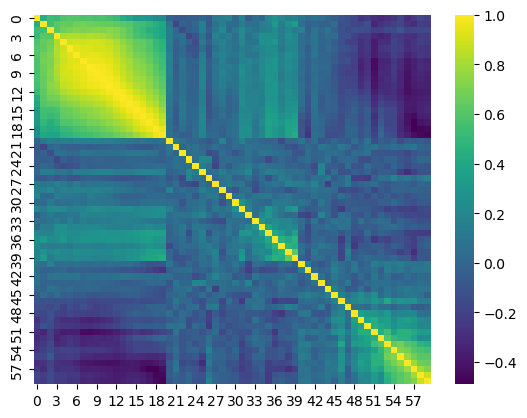

In [30]:
ax = sns.heatmap(norm_cov(desy3_covjk),cmap='viridis')
plt.show()

In [33]:
path = "../covs_bootstrap/"
dir_list = os.listdir(path)
cov_sum = np.array(np.zeros((60,60)))
for i in dir_list:
    with open(path+f'{i}', 'rb') as file:
        cov_ = pickle.load(file)
    cov_sum = cov_sum+np.array(cov_["res"]) 
cov_avg = cov_sum/len(dir_list)
with open('avgd_covs_bootstrap.pkl', 'wb') as newfile:
    pickle.dump(cov_avg,newfile)

In [36]:
desy3tbs = h5py.File('../TXPipe/data/desy3/outputs_bootstrap_avgd/tau_stats.hdf5','r')
desy3rbs = h5py.File('../TXPipe/data/desy3/outputs_bootstrap_avgd/rowe_stats.hdf5','r')
desy3_taubs = np.append(desy3tbs['tau_statistics/tau_PSF-reserved/tau0'][:],
                      [desy3tbs['tau_statistics/tau_PSF-reserved/tau2'][:],
                      desy3tbs['tau_statistics/tau_PSF-reserved/tau5'][:]])

desy3_covbs = desy3tbs['tau_statistics/tau_PSF-reserved/cov'][:]
desy3_fitbs = np.append(desy3tbs['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rbs['rowe_statistics/rowe_0_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/beta']*desy3rbs['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/eta']*desy3rbs['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:],
                      [desy3tbs['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rbs['rowe_statistics/rowe_2_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/beta']*desy3rbs['rowe_statistics/rowe_1_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/eta']*desy3rbs['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:],
                      desy3tbs['tau_statistics/bestfits_PSF-reserved/alpha']*desy3rbs['rowe_statistics/rowe_5_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/beta']*desy3rbs['rowe_statistics/rowe_4_PSF-reserved/xi_plus'][:]
                      + desy3tbs['tau_statistics/bestfits_PSF-reserved/eta']*desy3rbs['rowe_statistics/rowe_3_PSF-reserved/xi_plus'][:]])

In [37]:
print(calc_chi2(desy3_taubs,desy3_covbs,desy3_fitbs))

cov_mat chi2
371.7114668960165
